# Scatter plot graph generation with mean fluorescence values

### Libraries to use

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

In [110]:
import os
print(os.getcwd())

C:\Users\ADMIN


### Local data location

In [111]:
archivo_excel = r"C:\Users\ADMIN\Desktop\ROIs_refinadas\Mean_ROI_values_48000_thr130.xlsx"

df = pd.read_excel(archivo_excel)

# Load Ned(-) sheet in excel
df_neg = pd.read_excel(archivo_excel, sheet_name="Ned(-)")
df_neg["Ned19"] = "Ned(-)"

# Load Ned(+) sheet in excel
df_pos = pd.read_excel(archivo_excel, sheet_name="Ned(+)")
df_pos["Ned19"] = "Ned(+)"

# Merge both tables (Ned(-)/Ned(+))
df = pd.concat([df_neg, df_pos], ignore_index=True)


### Generation and download of scatter plot

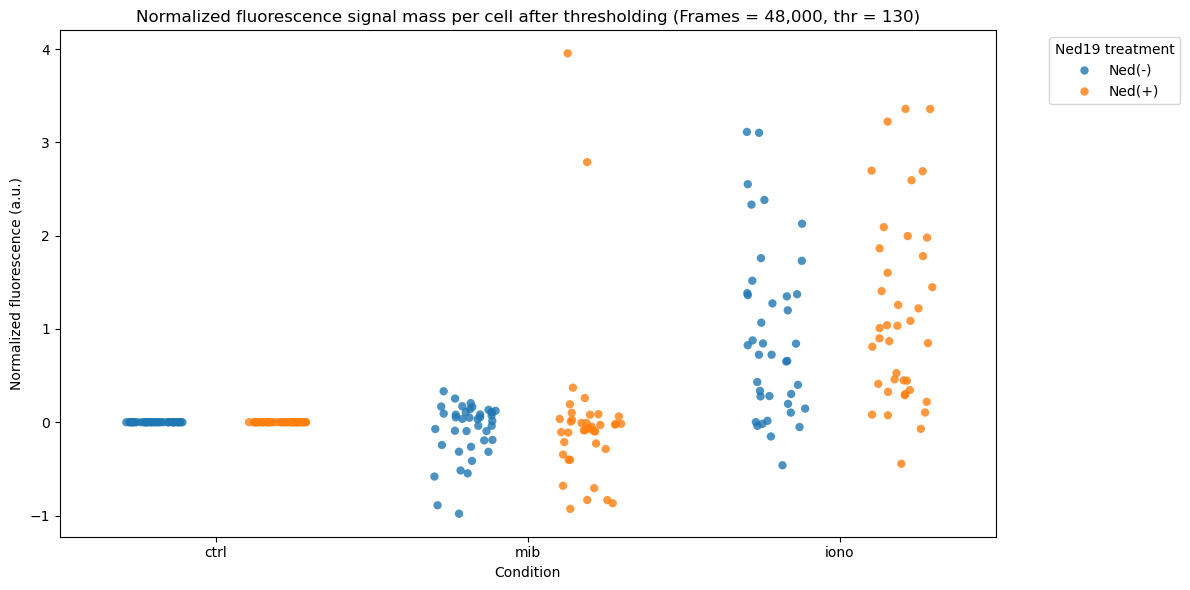

In [112]:
# 2. Graficar scatter por célula
# ==========================
plt.figure(figsize=(12,6))

sns.stripplot(
    data=df,
    x="Condición",      # 3 condiciones principales (ctrl, mib, iono)
    y="Signal_Mass_Norm",       # Fluorescencia neta
    hue="Ned19",        # Subgrupos: Ned(-) y Ned(+)
    dodge=True,         # coloca Ned(-) y Ned(+) uno junto al otro
    jitter=0.2,         # ligero jitter para evitar solapamiento
    alpha=0.8,          # transparencia
    size=6              # tamaño de puntos
)

# ==========================
# 3. Estética
# ==========================
plt.title("Normalized fluorescence signal mass per cell after thresholding (Frames = 48,000, thr = 130)")
plt.ylabel("Normalized fluorescence (a.u.)")
plt.xlabel("Condition")
plt.legend(title="Ned19 treatment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


# 4. Guardar y mostrar
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_Signal_Mass_Norm_48000_thr130_1.png", dpi=300)
plt.show()

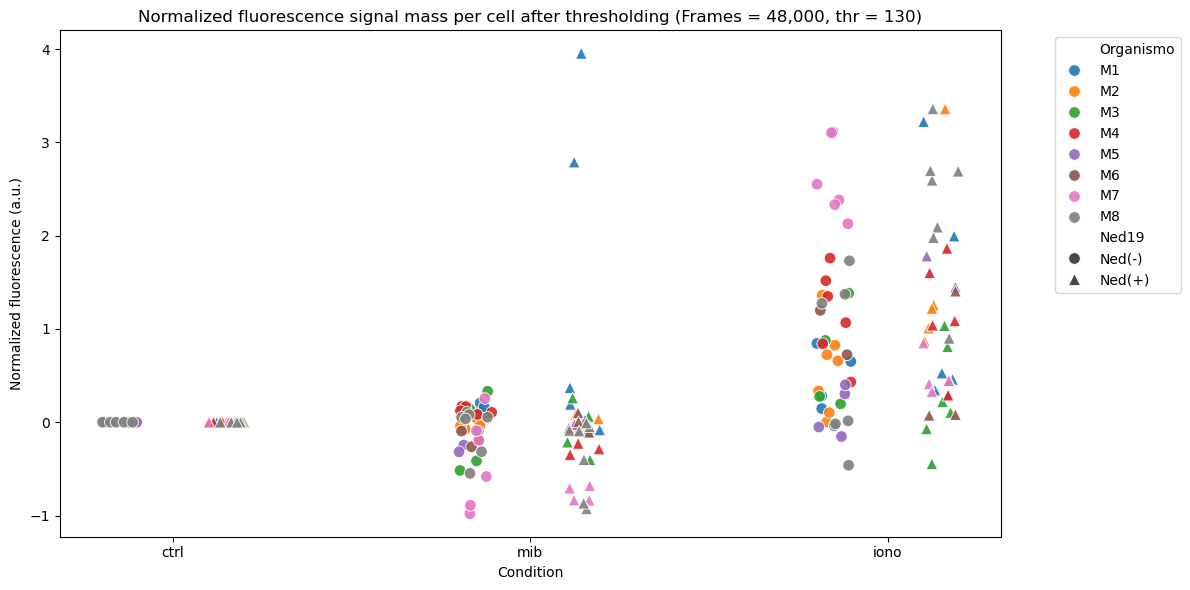

In [113]:
# Condition order
order = ["ctrl", "mib", "iono"]
df["Condición"] = pd.Categorical(df["Condición"], categories=order, ordered=True)

# Base numerical position
cond_map = {c: i for i, c in enumerate(order)}
df["x"] = df["Condición"].map(cond_map)

# Offset for each NED condition: Ned(-) / Ned(+)
offset_map = {"Ned(-)": -0.15, "Ned(+)": 0.15}
df["x_shift"] = df["x"].astype(float) + df["Ned19"].map(offset_map).astype(float)

# Small random jitter
np.random.seed(42)  # Fix random seed for reproducibility
df["x_jitter"] = df["x_shift"] + np.random.uniform(-0.05, 0.05, size=len(df)) # Add small random variation to avoid overlapping points

# Fixed palette by Organism
orgs = sorted(df["Organismo"].unique())   # Get sorted list of unique organisms
palette = dict(zip(orgs, sns.color_palette("tab10", n_colors=len(orgs))))   # Assign each organism a distinct color from tab10 palette

# Plot
plt.figure(figsize=(12,6))      # Create figure with defined size
sns.scatterplot(                
    data=df,
    x="x_jitter",               # Use jittered X values to spread points horizontally
    y="Signal_Mass_Norm",               # Plot fluorescence intensity on Y axis
    hue="Organismo",            # Color points by organism (M1, M2, …)
    palette=palette,            # Apply fixed color mapping
    style="Ned19",               # Marker shape by Ned(-) or Ned(+)
    markers={"Ned(-)": "o", "Ned(+)": "^"},    # Define circle for Ned(-) and triangle for Ned(+)
    s=70,                       # Marker size
    alpha=0.9,                  # Marker transparency
    legend="full"               # Show full legend (all hues and styles)
)

# Plot style and details
plt.xticks(range(len(order)), order)
plt.title("Normalized fluorescence signal mass per cell after thresholding (Frames = 48,000, thr = 130)")
plt.ylabel("Normalized fluorescence (a.u.)")
plt.xlabel("Condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=None)
plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_Signal_Mass_Norm_48000_thr130_2.png", dpi=300)
plt.show()

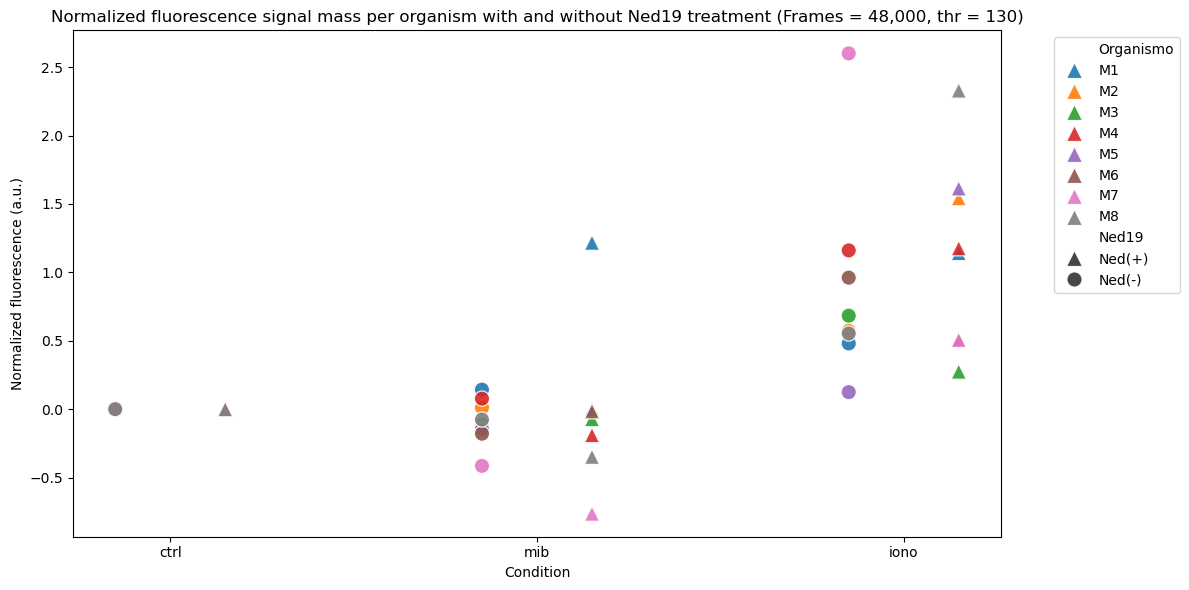

In [114]:
# --- Fluorescence mean by organisms, condition and with and without Ned19 treatment
df_mean = df.groupby(
    ["Organismo","Condición","Ned19"], 
    as_index=False, 
    observed=True
)["Signal_Mass_Norm"].mean()

# Condition order
order = ["ctrl", "mib", "iono"]
df_mean["Condición"] = pd.Categorical(df_mean["Condición"], categories=order, ordered=True)

# Mapping conditions with numerical positions
cond_map = {c: i for i, c in enumerate(order)}
df_mean["x"] = df_mean["Condición"].map(cond_map)

# Little Ned(-) and Ned(+) displacements while plotting (to separate them)
offset_map = {"Ned(-)": -0.15, "Ned(+)": 0.15}
df_mean["x_shift"] = df_mean["x"].astype(float) + df_mean["Ned19"].map(offset_map).astype(float)

# Fixed palette by Organism
orgs = sorted(df_mean["Organismo"].unique())
palette = dict(zip(orgs, sns.color_palette("tab10", n_colors=len(orgs))))

# Plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_mean,
    x="x_shift",
    y="Signal_Mass_Norm",
    hue="Organismo",                  
    palette=palette,
    style="Ned19",                    
    markers={"Ned(-)": "o", "Ned(+)": "^"},
    s=120,
    alpha=0.9
)

# Plot style and details
plt.xticks(range(len(order)), order)
plt.title("Normalized fluorescence signal mass per organism with and without Ned19 treatment (Frames = 48,000, thr = 130)")
plt.ylabel("Normalized fluorescence (a.u.)")
plt.xlabel("Condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=None)
plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_Signal_Mass_Norm_48000_thr130_3.png", dpi=300)
plt.show()

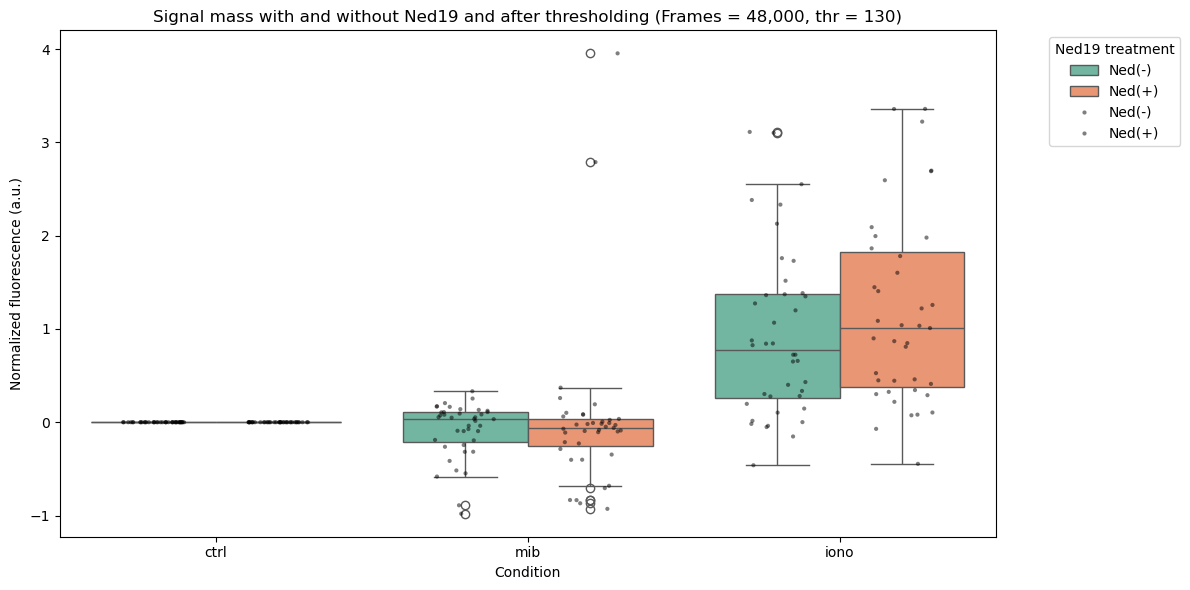

In [115]:
plt.figure(figsize=(12,6))               # Create a new figure with size 12x6 inches

sns.boxplot(
    data=df,
    x="Condición",
    y="Signal_Mass_Norm",
    hue="Ned19",                        # Subdivide each condition into Ned(-) and Ned(+)
    palette="Set2"                      # Use Set2 color palette for the two groups (another Set can be used)
)

sns.stripplot(
    data=df,
    x="Condición",
    y="Signal_Mass_Norm",
    hue="Ned19",                        # Same subdivision: Ned(-) vs Ned(+)
    dodge=True,                         # Place Ned(-)/Ned(+) side by side within each condition
    jitter=0.2,                         # Add horizontal noise so points don’t overlap exactly
    alpha=0.5,                          # Point transparency
    palette=["black"]*2,                # Force all points to be black regardless of Ned19
    size=3
)

plt.title("Signal mass with and without Ned19 and after thresholding (Frames = 48,000, thr = 130)")
plt.ylabel("Normalized fluorescence (a.u.)")
plt.xlabel("Condition")
plt.legend(title="Ned19 treatment", bbox_to_anchor=(1.05, 1), loc="upper left")    # Place legend outside the plot, to the right
plt.tight_layout()                                                                 # Adjust spacing to prevent overlap
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_Signal_Mass_Norm_48000_thr130_4.png", dpi=300)
plt.show()

# Normality and significance tests (with Adán 20250930)

## Obtaining the means by organism just for Mib condition

In [163]:
vals_minus = (df_mean
    .query('Condición == "mib" and Ned19 == "Ned(-)"')    
    .sort_values("Organismo")["Signal_Mass_Norm"]
    .to_numpy())

vals_plus = (df_mean
    .query('Condición == "mib" and Ned19 == "Ned(+)"')    
    .sort_values("Organismo")["Signal_Mass_Norm"]
    .to_numpy())

print("Mib Ned(-):", len(vals_minus), vals_minus)
print("Mib Ned(+):", len(vals_plus), vals_plus)

vals = vals_minus

Mib Ned(-): 8 [ 0.14270137  0.0113209  -0.11491144  0.07692768 -0.14594851 -0.17903509
 -0.41429268 -0.0760926 ]
Mib Ned(+): 8 [ 1.21703854e+00 -1.01109002e-03 -7.28180954e-02 -1.89452145e-01
 -9.64903647e-05 -1.52174844e-02 -7.64178580e-01 -3.48226517e-01]


## Selecting organims from Mib condition (just for testing distribution normality)

In [164]:
labels = ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"]  # <- list

# Convert labels to NumPy array
lbls = np.array(labels)

# Create mask excluding M1 and M2
mask = ~np.isin(labels, ["M1", "M2", "M4"])   # Add ["M1", "M2"])

# Apply mask to both arrays
vals_filtered = vals[mask]
labels_filtered = lbls[mask]

print("Filtered labels:", labels_filtered)
print("Filtered vals:", vals_filtered)
vals = vals_filtered
labels = labels_filtered


Filtered labels: ['M3' 'M5' 'M6' 'M7' 'M8']
Filtered vals: [-0.11491144 -0.14594851 -0.17903509 -0.41429268 -0.0760926 ]


## Shapiro-Wilk test and then decide between performing one-sample t-test or Wilcoxon signed-rank test

In [165]:
from scipy import stats
from scipy.stats import shapiro

# 1. Shapiro–Wilk Test for normality
shapiro_stat, shapiro_p = stats.shapiro(vals)
print(f"Shapiro–Wilk: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")

# 2. Decide which test to use
if shapiro_p >= 0.05:
    # Normal distribution → one-sample t-test
    t_stat, t_p = stats.ttest_1samp(vals, popmean=0)
    print(f"One-sample t-test: t = {t_stat:.4f}, p = {t_p:.4f}")
    if t_p < 0.05:
        print("✅ The mean differs significantly from 0 (p < 0.05).")
    else:
        print("❌ No significant difference from 0 (p ≥ 0.05).")
else:
    # Non-normal → Wilcoxon signed-rank test (median vs 0)
    w_stat, w_p = stats.wilcoxon(vals, alternative='two-sided', zero_method='wilcox', correction=False)
    print(f"Wilcoxon signed-rank: W = {w_stat:.4f}, p = {w_p:.4f}")
    if w_p < 0.05:
        print("✅ The median differs significantly from 0 (p < 0.05).")
    else:
        print("❌ No significant difference from 0 (p ≥ 0.05).")


Shapiro–Wilk: W = 0.8141, p = 0.1051
One-sample t-test: t = -3.1248, p = 0.0354
✅ The mean differs significantly from 0 (p < 0.05).


In [157]:
labels

array(['M2', 'M3', 'M4', 'M5', 'M6'], dtype='<U2')

In [158]:
vals

array([-1.01109002e-03, -7.28180954e-02, -1.89452145e-01, -9.64903647e-05,
       -1.52174844e-02])

## Normalized mass signal per organism

Mean = -0.0557, SD = 0.0805, n = 5


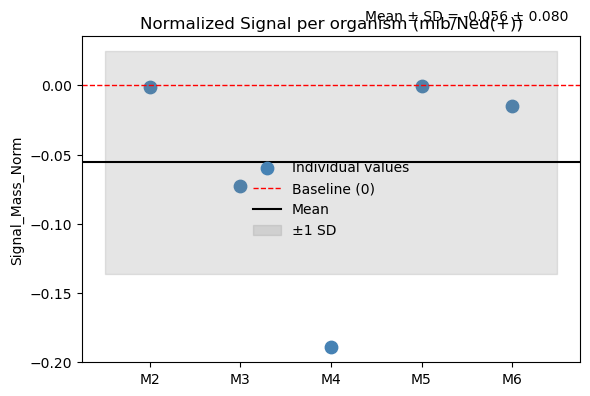

In [159]:
# Descriptive statistics
mean_val = np.mean(vals)
sd_val   = np.std(vals, ddof=1)  # sample SD
n        = len(vals)

print(f"Mean = {mean_val:.4f}, SD = {sd_val:.4f}, n = {n}")

# --------------------------------------------------------------------
# Create figure
plt.figure(figsize=(6, 4))

# Individual points
plt.scatter(np.arange(n), vals, color='steelblue', s=80, label="Individual values")

# Reference line at zero
plt.axhline(0, color='red', linestyle='--', linewidth=1, label="Baseline (0)")

# Mean line and SD shading
plt.axhline(mean_val, color='black', linestyle='-', linewidth=1.5, label="Mean")
plt.fill_between(
    [-0.5, n-0.5],
    mean_val - sd_val,
    mean_val + sd_val,
    color='gray',
    alpha=0.2,
    label='±1 SD'
)
# --------------------------------------------------------------------
# Axes and labels
plt.xticks(np.arange(n), labels)
plt.ylabel("Signal_Mass_Norm")
plt.title("Normalized Signal per organism (mib/Ned(+))")
plt.legend(loc="best", frameon=False)
plt.tight_layout()

# --------------------------------------------------------------------
# Optional annotation of mean ± SD
plt.text(
    n - 1.5,            # x position
    mean_val + sd_val + 0.02,  # y position slightly above SD bar
    f"Mean ± SD = {mean_val:.3f} ± {sd_val:.3f}",
    fontsize=10,
    ha="center",
    va="bottom"
)

plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\P-hack_scatter_Signal_Mass_Norm_48000_thr130_NedPlus_5.png", dpi=300)
plt.show()

# Normality and significance tests (Rodrigo Escobedo 20250930-2025)

## Obtaining the means by organism

In [56]:
from scipy.stats import shapiro

# Load and label Ned(-)
df_ned_minus = pd.read_excel(archivo_excel, sheet_name="Ned(-)")
df_ned_minus["Ned19"] = 0

# Load and label Ned(+)
df_ned_plus = pd.read_excel(archivo_excel, sheet_name="Ned(+)")
df_ned_plus["Ned19"] = 1

# Combine both
df = pd.concat([df_ned_minus, df_ned_plus], ignore_index=True)

# Collapse by Organism, Condition, and Ned19
df_mean = (
    df.groupby(["Organismo", "Condición", "Ned19"], as_index=False, observed=True)
      ["Signal_Mass_Norm"].mean()
)

# Select Mib groups
mib_ned_minus = df_mean[(df_mean["Condición"] == "mib") & (df_mean["Ned19"] == 0)]["Signal_Mass_Norm"]
mib_ned_plus  = df_mean[(df_mean["Condición"] == "mib") & (df_mean["Ned19"] == 1)]["Signal_Mass_Norm"]

print("Mib Ned(-) n =", len(mib_ned_minus))
print("Mib Ned(+) n =", len(mib_ned_plus))


Mib Ned(-) n = 8
Mib Ned(+) n = 8


In [57]:
print(mib_ned_plus)
print(mib_ned_minus)

5     1.217039
11   -0.001011
17   -0.072818
23   -0.189452
29   -0.000096
35   -0.015217
41   -0.764179
47   -0.348227
Name: Signal_Mass_Norm, dtype: float64
4     0.142701
10    0.011321
16   -0.114911
22    0.076928
28   -0.145949
34   -0.179035
40   -0.414293
46   -0.076093
Name: Signal_Mass_Norm, dtype: float64


## Shapiro-Wilk test performance to Mib Ned(-)/Ned(-)

In [58]:
# Shapiro-Wilk test for normality
# H0: data comes from a normal distribution

for label, data in [("Mib Ned(-)", mib_ned_minus), ("Mib Ned(+)", mib_ned_plus)]:
    if len(data) >= 3:
        stat, p = shapiro(data)
        print(f"\nShapiro–Wilk test for {label}")
        print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")
        if p > 0.05:
            print("Fail to reject H0 → Data looks normally distributed.")
        else:
            print("Reject H0 → Data is not normally distributed.")
    else:
        print(f"\n{label}: Not enough samples for Shapiro-Wilk (n={len(data)}).")


Shapiro–Wilk test for Mib Ned(-)
Statistic = 0.9578, p-value = 0.7894
Fail to reject H0 → Data looks normally distributed.

Shapiro–Wilk test for Mib Ned(+)
Statistic = 0.8135, p-value = 0.0399
Reject H0 → Data is not normally distributed.


## One-sample t-test

In [59]:
 # Normal distribution → one-sample t-test
t_stat, t_p = stats.ttest_1samp(vals, popmean=0)
print(f"One-sample t-test: t = {t_stat:.4f}, p = {t_p:.4f}")
if t_p < 0.05:
    print("✅ The mean differs significantly from 0 (p < 0.05).")
else:
    print("❌ No significant difference from 0 (p ≥ 0.05).")

One-sample t-test: t = -3.1319, p = 0.0520
❌ No significant difference from 0 (p ≥ 0.05).


## Kolmogorov–Smirnov Test & D’Agostino–Pearson Omnibus Test

In [11]:
from scipy.stats import kstest, norm, normaltest

# Load your Excel file (replace with your path)
df = pd.read_excel(archivo_excel, sheet_name=1) # sheet_name (0 = Ned(-) and 1 = Ned(+))

# Extract the variable of interest
data = df["Signal_Mass_Norm"].dropna()

# -------------------------------
# Kolmogorov–Smirnov Test
# -------------------------------
mu, sigma = np.mean(data), np.std(data, ddof=1)
ks_stat, ks_p = kstest(data, "norm", args=(mu, sigma))

print("Kolmogorov–Smirnov Test")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

if ks_p > 0.05:
    print("Fail to reject H0 → Data looks normally distributed (K-S test).")
else:
    print("Reject H0 → Data is not normally distributed (K-S test).")

print("-" * 50)

# -------------------------------
# D’Agostino–Pearson Omnibus Test
# -------------------------------
dag_stat, dag_p = normaltest(data)

print("D’Agostino–Pearson Omnibus Test")
print(f"Statistic = {dag_stat:.4f}, p-value = {dag_p:.4f}")

if dag_p > 0.05:
    print("Fail to reject H0 → Data looks normally distributed (Omnibus test).")
else:
    print("Reject H0 → Data is not normally distributed (Omnibus test).")

Kolmogorov–Smirnov Test
Statistic = 0.2878, p-value = 0.0000
Reject H0 → Data is not normally distributed (K-S test).
--------------------------------------------------
D’Agostino–Pearson Omnibus Test
Statistic = 51.6213, p-value = 0.0000
Reject H0 → Data is not normally distributed (Omnibus test).


In [12]:
type(norm)

scipy.stats._continuous_distns.norm_gen

## Mann–Whitney U test & Wilcoxon signed-rank test

In [13]:
from scipy.stats import mannwhitneyu, wilcoxon

# Path to your Excel file
excel_file = r"C:\Users\ADMIN\Desktop\ROIs_refinadas\Mean_ROI_values_48000_thr130.xlsx"

# -------------------------------------------------------
# Load data from separate sheets
# One sheet contains Ned(-), another sheet contains Ned(+)
# You can use the sheet index (0, 1, ...) or the sheet name ("Ned(-)", "Ned(+)")
# -------------------------------------------------------
df_ned_minus = pd.read_excel(excel_file, sheet_name="Ned(-)")  # sheet with Ned(-) values
ned_minus = df_ned_minus["Signal_Mass_Norm"].dropna()          # extract column and remove NaN

df_ned_plus = pd.read_excel(excel_file, sheet_name="Ned(+)")   # sheet with Ned(+) values
ned_plus = df_ned_plus["Signal_Mass_Norm"].dropna()            # extract column and remove NaN

# -------------------------------------------------------
# Non-parametric test 1: Mann–Whitney U
# Compare two independent groups: Ned(-) vs Ned(+)
# H0: distributions of Ned(-) and Ned(+) are the same
# -------------------------------------------------------
u_stat, u_p = mannwhitneyu(ned_minus, ned_plus, alternative="two-sided")
print("Mann–Whitney U test (Ned(-) vs Ned(+))")
print(f"Statistic = {u_stat:.4f}, p-value = {u_p:.4f}")

# -------------------------------------------------------
# Non-parametric test 2: Wilcoxon signed-rank test
# Compare each group against 0 (if values are normalized to a control = 0)
# H0: median of the distribution = 0
# -------------------------------------------------------
w_stat_minus, w_p_minus = wilcoxon(ned_minus, alternative="two-sided")
w_stat_plus, w_p_plus = wilcoxon(ned_plus, alternative="two-sided")

print("\nWilcoxon signed-rank test (vs 0)")
print(f"Ned(-) vs 0 → Statistic = {w_stat_minus:.4f}, p-value = {w_p_minus:.4f}")
print(f"Ned(+) vs 0 → Statistic = {w_stat_plus:.4f}, p-value = {w_p_plus:.4f}")


Mann–Whitney U test (Ned(-) vs Ned(+))
Statistic = 7185.0000, p-value = 0.7507

Wilcoxon signed-rank test (vs 0)
Ned(-) vs 0 → Statistic = 765.0000, p-value = 0.0000
Ned(+) vs 0 → Statistic = 763.0000, p-value = 0.0001


In [14]:
sheet_name=0
print(sheet_name)

0
